<a href="https://colab.research.google.com/github/shivkumarganesh/Advance-Deep-Learning/blob/main/Assignment%204/AutoViML_Tabular_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing the required Packages for AutoViML

Took some reference from https://www.kaggle.com/rsesha/autoviml-autonlp-on-titanic-demo-kernel/notebook

In [7]:
!pip install deep_autoviml
!pip install kaggle

In [10]:
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [12]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.4MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 30.4MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.26MB/s]


In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data Preperation Phase

In [14]:
train = pd.read_csv('/content/train.csv',index_col=None)
print(train.shape)
test = pd.read_csv('//content/test.csv',index_col=None)
print(test.shape)
subm = pd.read_csv('/content/gender_submission.csv',index_col=None)
print(subm.shape)

(891, 12)
(418, 11)
(418, 2)


In [15]:
!pip install autoviml

     |████████████████████████████████| 125 kB 8.1 MB/s 
     |████████████████████████████████| 76.4 MB 23 kB/s 
     |████████████████████████████████| 189 kB 61.4 MB/s 
     |████████████████████████████████| 125 kB 62.7 MB/s 
     |████████████████████████████████| 356 kB 61.2 MB/s 
     |████████████████████████████████| 173.5 MB 69 kB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491650 sha256=98cf1c864e4b1c1ff798476bfec32afaf672785b8fb7de187c69f7b635df5223
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [16]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.683. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [17]:
target = 'Survived'

#  Predicting the people who survived

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (891, 12)
    Training Set Memory Usage = 0.08 MB
Test Set Shape = (418, 11)
    Test Set Memory Usage = 0.04 MB
Single_Label Target: ['Survived']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
       Class  -> Counts -> Percent
           0:     549  ->   61.6%
           1:     342  ->   38.4%
    Target Survived is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    11 Predictors classified...
        This does not include the Target column(s)
    2 variables removed since they were ID or low-information variables
Number of Processors on this device = 1
CPU available
    GPU active on this device
########

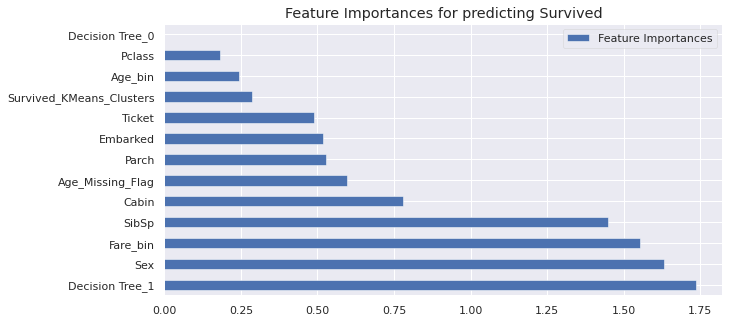

In [18]:
m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission=subm,
                            scoring_parameter='balanced-accuracy', KMeans_Featurizer=True,
                            hyper_param='GS',feature_reduction=True,
                             Boosting_Flag=None,Binning_Flag=True,
                            Add_Poly=0, Stacking_Flag=True,Imbalanced_Flag=False,
                            verbose=0)

In [19]:
subm[target] = testm[target+'_predictions'].astype(int).values

In [20]:
subm.to_csv('/content/submission.csv',index=False)

# Below section shows the result of uploading the tabular data predictions using AutoViML

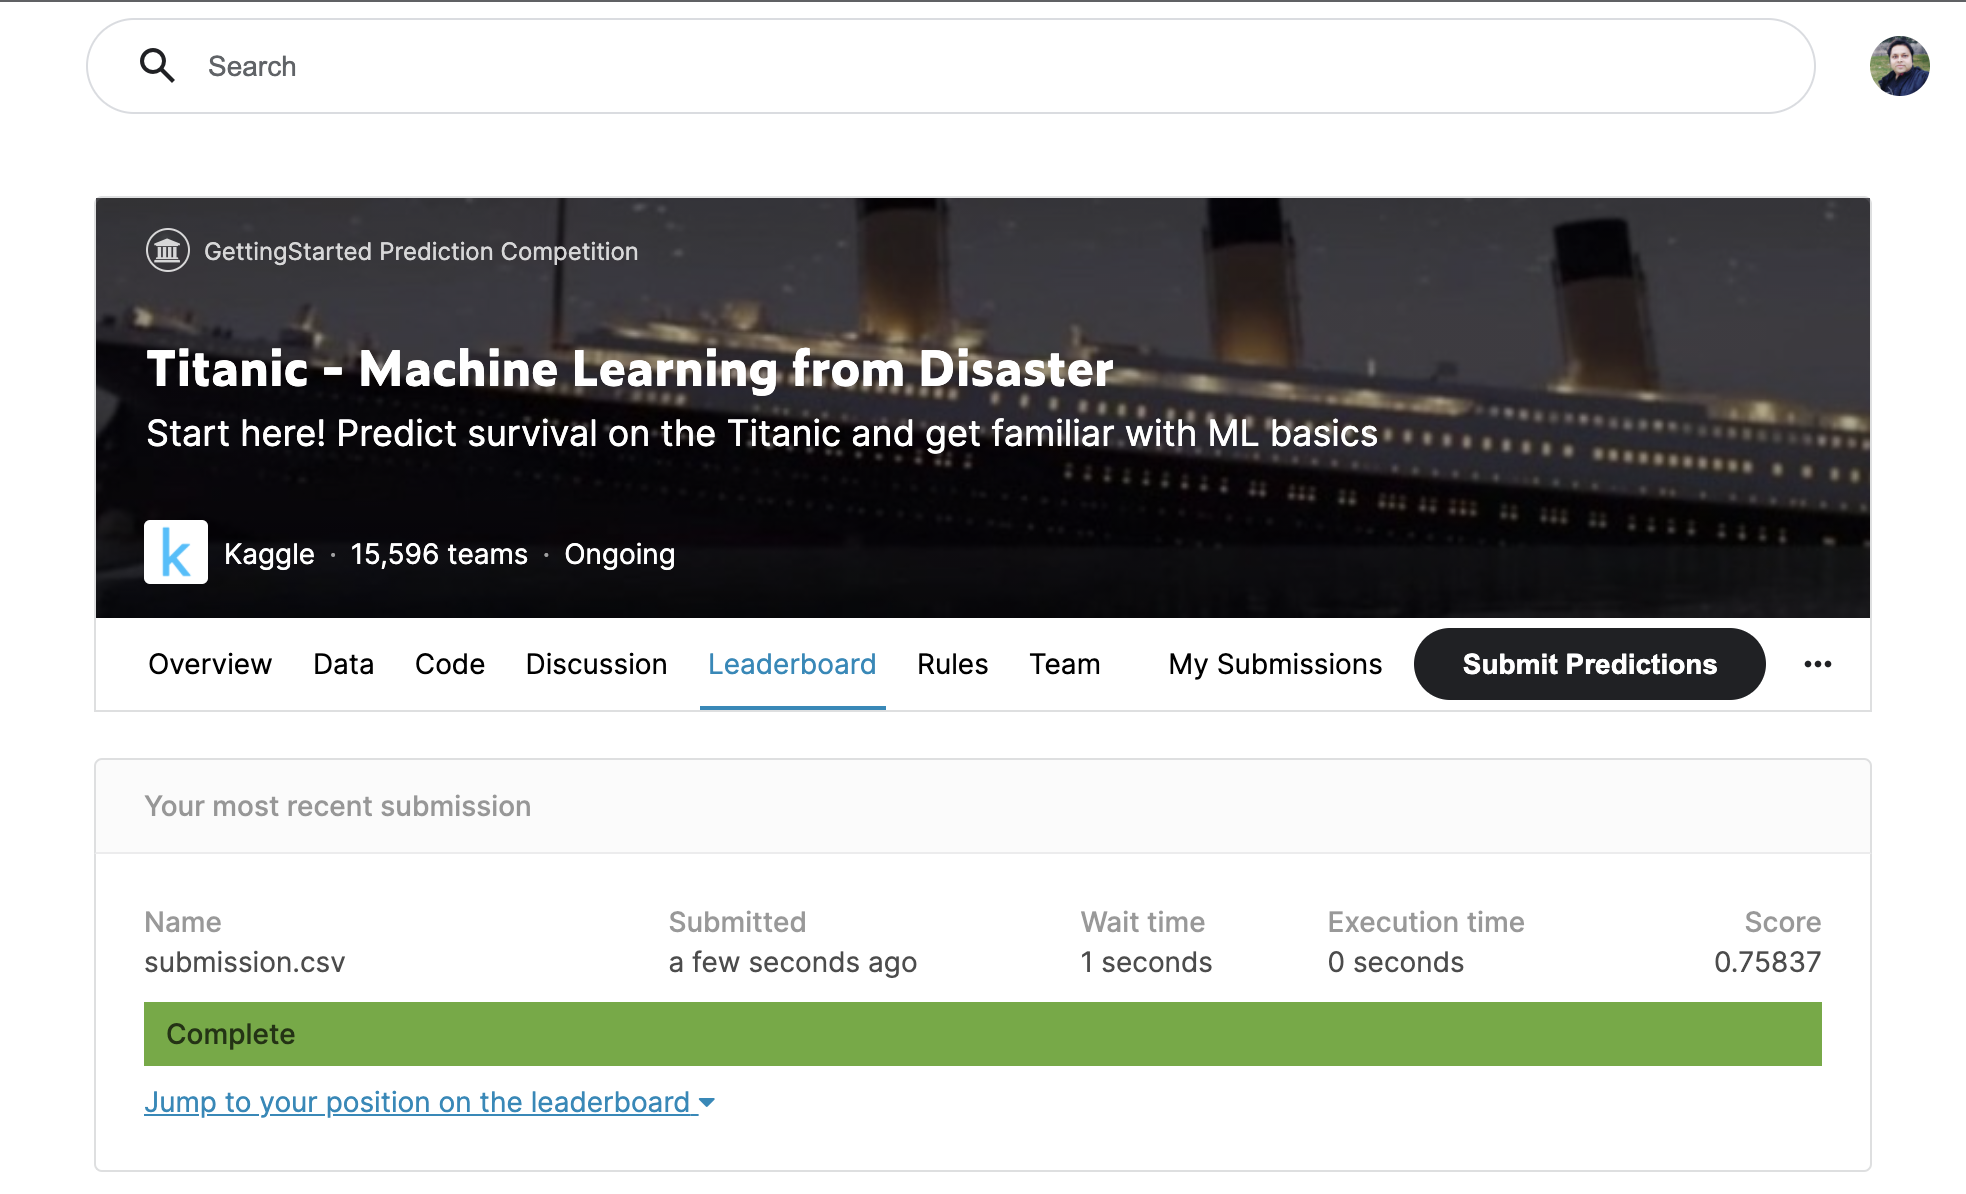

